# Final Project Submission -Phase 4
Please fill out:

<li> Student name:Calvine Dasilver, Jack otieno , Sandra Kiptum, Salahudin Salat      and                Hellen Samuel
<li> Student pace: full time
<li> Scheduled project review date/time:
<li> Instructor name: Nikita
<li> Blog post URL:

# Predicting Future Housing Markets with Zillow's Data

## Business Understanding

#### Overview/Background Information

A real estate company is on a mission to find the hottest zip codes to invest in. They've got historical housing data from Zillow, like a time capsule, and they'll use it to predict future price trends. By analyzing this data, they want to pinpoint the top 5 zip codes with the most promising investment potential.

#### Problem Statement

Create a data-based recommendation for the top 5 zip codes the real estate investment firm should focus on, considering future price trends, risk factors, and the firm's investment timeframe.

#### Objectives

1. Build a model to predict future real estate prices for different zip codes.
2. Review the predictions by looking at profit potential, risk, and how long to hold the investment.
3. Suggest the top 5 zip codes for investment based on these factors.

#### Challenges

1. Determining the "optimal" investment requires balancing the potential for profit (expected price appreciation), risk tolerance (price instability), and investment duration (holding period).
2. Real estate prices are influenced by factors beyond past data, including economic conditions, local development projects, and interest rates.
3. Time series models have limitations; they cannot ensure accurate predictions, and future market behavior is inherently uncertain.

#### Proposed Solution: Metrics of Success

To address these challenges, we propose the following approach:


1. Apply time series forecasting to the provided historical Zillow data to predict future real estate prices across different zip codes.
2. Analyze the forecasts by evaluating the profit potential, which is the expected price increase in each zip code; the risk, which involves the historical price volatility in each zip code; and the investment horizon, which refers to the planned duration of holding the investment.
3. Prioritizing investment opportunities involves analyzing forecasted prices, profit potential, and risk to identify the top 5 most promising zip codes for real estate investment.


#### Conclusion

We'll predict future real estate prices and look at how much money can be made and how risky each area is. This will help us recommend the 5 best zip codes to invest in. How well we do depends on how good our predictions are and how carefully we consider everything.





## Data Understanding

 **Let's dive in! We'll start by loading the dataset and checking out the first few entries.**












In [1]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf


In [2]:
# Load the dataset
data_path = "zillow_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


To understand the data structure, we'll examine its shape (number of rows and columns), list the column names, and identify the data types for each column.

In [3]:
class RealEstateAnalyzer(object):
  """
  This class analyzes real estate data for investment purposes.
  """
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_info(self):
    """
    Prints information about the data shape, column names, and data types.
    """
    print(f"Data shape (rows, columns): {self.data.shape}")
    print(f"Column names:\n{self.data.columns.tolist()}")
    print(f"Data types:\n{self.data.dtypes}")


data_path = "zillow_data.csv"  # Replace with your data path
analyzer = RealEstateAnalyzer(data_path)

analyzer.get_data_info()


Data shape (rows, columns): (14723, 272)
Column names:
['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10

1. The dataset contains 14,723 rows and 272 columns.

2. The dataset contains the following columns:

* RegionID: Unique identifier for the region.
* RegionName: Zip code of the region.
* City: City name.
* State: State abbreviation.
* Metro: Metro area.
* CountyName: County name.
* SizeRank: Rank by size.
* Date columns (from 1996-04 to 2018-04): Real estate prices for each month in this period.


In [4]:
class RealEstateAnalyzer:
  """Analyzes real estate data for investment."""
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_type_counts(self):
    print(f"Number of features by data type:\n{self.data.dtypes.value_counts()}")


data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.get_data_type_counts()


Number of features by data type:
float64    219
int64       49
object       4
dtype: int64


<li> Data Types:

1. 49 columns are of type int64 (mostly identifiers).

2. 219 columns are of type float64 (real estate prices).

3. 4 columns are of type object (text data: City, State, Metro, CountyName).

In [5]:
# Display summary statistics for numerical columns
df.describe()


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


Statistical Summary:

* There's a clear upward trend in real estate prices. The average price in 1996 was around 118,299 in dollas , and by 2018, it had risen to 288,039 in dollas.
* Prices vary a lot between zip codes, showing the different types of real estate markets in each area.

## Data Preparation

In [6]:
def read_and_info(file_path):
  data = pd.read_csv(file_path)
  print("Details about the data:\n")
      
  print("Shape of the dataset:")
  print(data.shape)
  print()

  print("Columns of the dataset:")
  print(data.columns)
  print()

  print("Head of the dataset:")
  display(data.head())
  print()

  # Display information about the dataset
  print("Data information:")
  data_info = data[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']].info()
  print(data_info)
  print()

  print("Descriptive Statistics of the dataset:")
  display(data.describe())

  return data


In [7]:
data = read_and_info("zillow_data.csv")

Details about the data:

Shape of the dataset:
(14723, 272)

Columns of the dataset:
Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

Head of the dataset:


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    14723 non-null  int64 
 1   RegionName  14723 non-null  int64 
 2   City        14723 non-null  object
 3   State       14723 non-null  object
 4   Metro       13680 non-null  object
 5   CountyName  14723 non-null  object
 6   SizeRank    14723 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 805.3+ KB
None

Descriptive Statistics of the dataset:


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [8]:
data.rename(columns={"RegionName":"zipcode"}, inplace=True)
data.head(117)

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,60081,6010,Bristol,CT,Hartford,Hartford,113,120300.0,120000.0,119800.0,...,188900,190000,191200,191800,192900,193600,194100,194900,195700,195700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
114,95309,87114,Albuquerque,NM,Albuquerque,Bernalillo,115,139000.0,139200.0,139300.0,...,207300,208400,209600,210700,211800,213100,214100,215200,216600,217600
115,95804,89108,Las Vegas,NV,Las Vegas,Clark,116,102500.0,102500.0,102500.0,...,180400,183300,186600,190200,193400,197300,200700,203500,206600,209300


In [9]:
def calculate_annualized_roi(df):
    """
    Calculate and sort the annualized ROI for each RegionName in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data.

    Returns:
    pd.DataFrame: A dataframe with RegionName, City, State, and Annualized_ROI, sorted by Annualized_ROI in descending order.
    """
    # Define the start and end dates
    start_date = '1996-04'
    end_date = '2018-04'
    
    # Recalculate the number of years between the earliest and latest date
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])
    start_month = int(start_date.split('-')[1])
    end_month = int(end_date.split('-')[1])
    
    years_difference = (end_year - start_year) + (end_month - start_month) / 12
    
    # Calculate the Annualized ROI for each RegionName
    df['Annualized_ROI'] = ((df[end_date] / df[start_date])**(1/years_difference) - 1) * 100
    
    # Select relevant columns
    annualized_roi_df = df[['zipcode', 'City', 'State', 'Annualized_ROI']]
    
    # Sort the DataFrame based on Annualized_ROI in descending order
    sorted_annualized_roi_df = annualized_roi_df.sort_values(by='Annualized_ROI', ascending=False)
    
    return sorted_annualized_roi_df




In [10]:
sorted_ROI_df = calculate_annualized_roi(data)
sorted_ROI_df.head()

,zipcode,City,State,Annualized_ROI
117,11211,New York,NY,12.037577
1155,11222,New York,NY,11.756919
475,11216,New York,NY,11.489144
191,7302,Jersey City,NJ,11.233243
106,11215,New York,NY,11.004257


from this we can see that the best states to invest in are new york and jersey city

In [11]:
data.drop(columns=["Annualized_ROI"], inplace=True)

In [12]:
# reshape the data

def melt_data(df):
    ''' 
    Takes a dataframe with datetime data that is in wide format and melts it into long format; 
    Tranforms data into datetime object with time as index.
    User will need to change columns names on first line of code according to their own dataframe.
    '''
    
    melted = pd.melt(df, id_vars=["RegionID", "zipcode", "City", "State", "Metro", "CountyName", "SizeRank"], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#.groupby('time').aggregate({'value':'mean'})

In [13]:
data = melt_data(data)
data.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [14]:
# check on the new shape of our data
data.shape

(3744704, 9)

In [15]:
# checking how many unique values we have on each column, besides the time data
data.iloc[:,0:8].nunique()

RegionID      14723
zipcode       14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
time            265
dtype: int64

In [16]:
# filtering only data for New York City and jersey city
nyc = data.loc[data['City'] == 'New York']
nyc.tail()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,time,value
3894880,62122,11436,New York,NY,New York,Queens,8009,2018-04-01,400300.0
3895175,62078,11366,New York,NY,New York,Queens,8304,2018-04-01,893600.0
3895259,61783,10307,New York,NY,New York,Richmond,8388,2018-04-01,575900.0
3896783,62075,11363,New York,NY,New York,Queens,9912,2018-04-01,1051300.0
3897909,61804,10464,New York,NY,New York,Bronx,11038,2018-04-01,536200.0


In [17]:
nyc = nyc.groupby('time').aggregate({'value':'mean'})
nyc.set_index=("time")
nyc.head(20)

,value
time,
1996-04-01,214819.230769
1996-05-01,215233.653846
1996-06-01,215698.076923
1996-07-01,216186.538462
1996-08-01,216720.192308
1996-09-01,217312.500000
1996-10-01,217988.461538
1996-11-01,218839.423077
1996-12-01,219902.884615


In [18]:
class data_cleaning:
    def __init__(self, data):
        self.data = data   

    def remove_outliers_zscore(self):
        """
        Takes in a dataframe and removes outliers from the dataframe using Z-score method.
        """
        z_scores = np.abs(stats.zscore(self.df.select_dtypes(include=[np.number])))        
        # Identify rows with any Z-score greater than the threshold
        outliers = (z_scores > 3).any(axis=1)        
        # Remove outliers from the dataframe
        df_cleaned = self.df[~outliers]
        
        return self.data
    
    def missing_values_percentage(self):
        total = self.data.isnull().sum().sort_values(ascending=False)
        percent = (self.data.isnull().sum() / self.data.isnull().count() * 100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        return missing_data
    
    def fill_missing_values(self, strategy='median'):        
        self.data = self.data.fillna(self.data.median())
        return self.data
    
    def remove_null_values(self):
        self.data = self.data.dropna()
        return self.data
    
    

In [19]:
cleaner = data_cleaning(data)
cleaner.missing_values_percentage()

,Total,Percent
Metro,236023,6.302848
value,0,0.000000
time,0,0.000000
SizeRank,0,0.000000
CountyName,0,0.000000
State,0,0.000000
City,0,0.000000
zipcode,0,0.000000
RegionID,0,0.000000


In [20]:
data = data.drop(columns=["Metro"])
data.head()

,RegionID,zipcode,City,State,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,5,1996-04-01,77300.0


In [21]:
data = data.set_index("time")


In [22]:
data.head()

,RegionID,zipcode,City,State,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,5,77300.0


## Before cleaning the data

In summary, the plot indicates that there are significant outliers in the real estate prices for each month, suggesting the presence of extreme high values. The distribution of prices is relatively consistent over time, with a positive skewness indicating more high-value outliers.


## After cleaning the data

In summary, the plot indicates that the data cleaning process has removed all outliers, resulting in an empty plot. This suggests that the z-score threshold might need to be adjusted to retain more data points while still removing extreme outliers.

# Checking for missing values

## Handling missing values and null values

We'll implement a method to fill missing values with the median of each column.

## Filter the data

Want to select the best zip codes (RegionName) to invest in.

The best here is Return on investment (ROI)

## EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis involves the following;

Univariate Analysis: Involves the analysis of individual variables to understand their distribution and summary statistics.

Bivariate Analysis: Involves the analysis between two variables.

Multivariate Analysis: Involves the analysis among three or more variables.

So for our case we are going to use Univariate, Bivariate and multivariate analysis.

## Univariate Analysis

## Distribution of the ROI

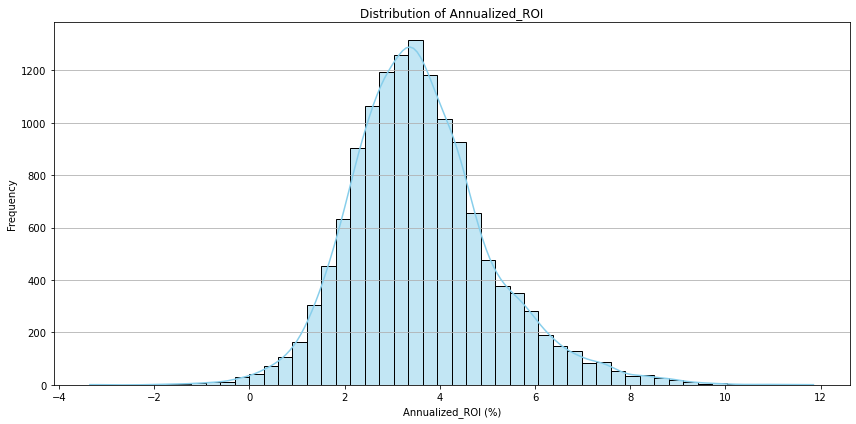

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def plot_univariate_analysis(self):
        """Plots the distribution of Annualized_ROI."""
        plt.figure(figsize=(12, 6))
        sns.histplot(self.data['Annualized_ROI'], kde=True, color='skyblue', bins=50)
        plt.title('Distribution of Annualized_ROI')
        plt.xlabel('Annualized_ROI (%)')
        plt.ylabel('Frequency')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.plot_univariate_analysis()

This means that we are focusing areas that are at the extreme end of the distribution as they have more than 10% ROI

## Bivariate Analysis

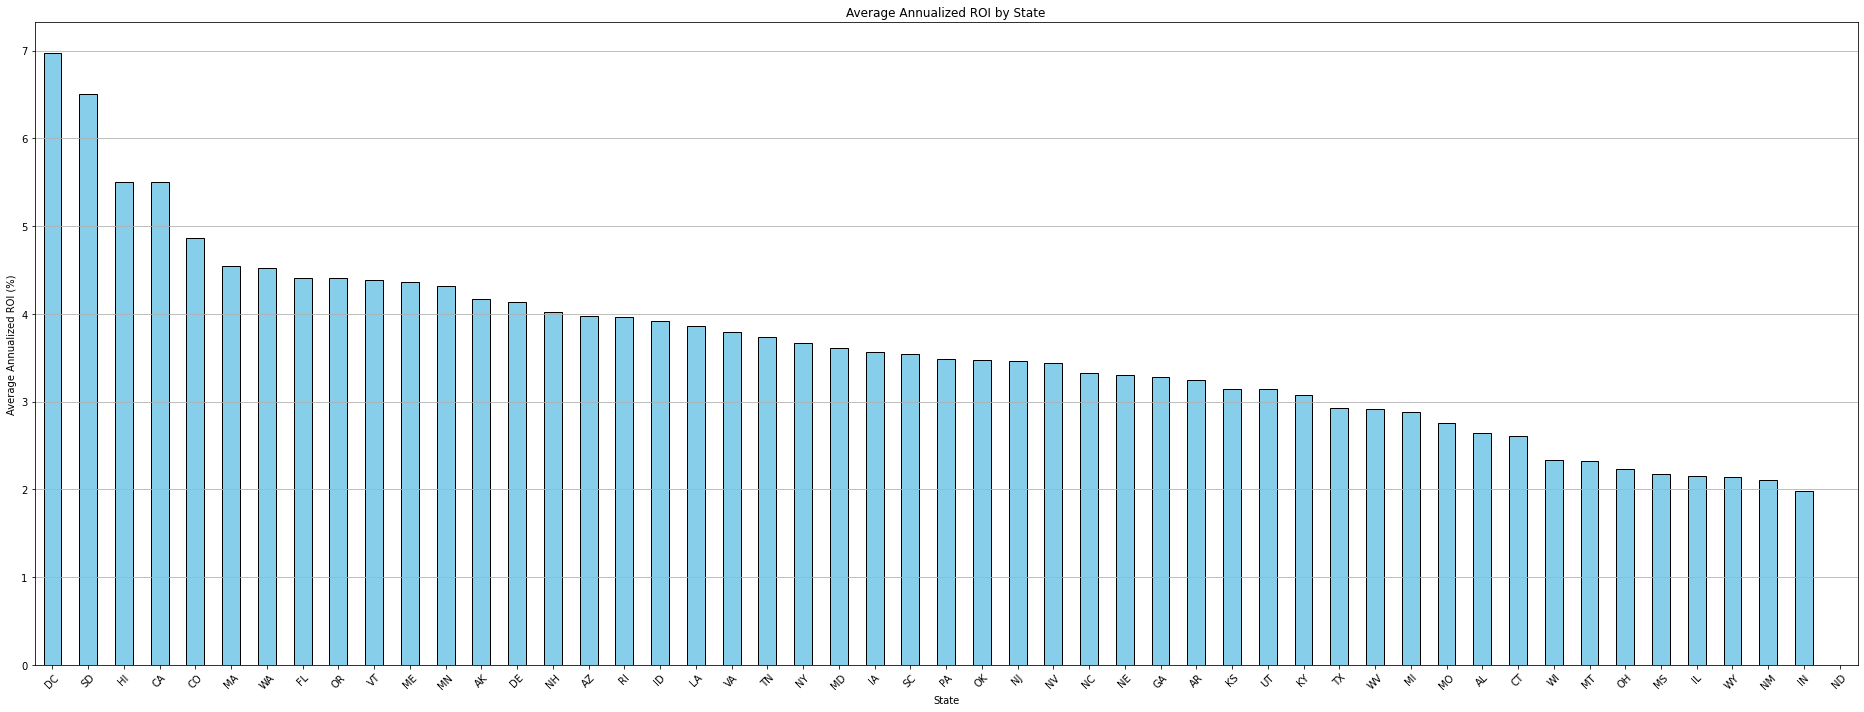

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.calculate_annualized_roi()
    
    def calculate_annualized_roi(self):
        """Calculates the Annualized ROI for each RegionName."""
        years_difference = (2018 - 1996) + (4/12)
        self.data['Annualized_ROI'] = ((self.data['2018-04'] / self.data['1996-04'])**(1/years_difference) - 1) * 100
        self.data.sort_values(by='Annualized_ROI', ascending=False, inplace=True)
    
    def plot_bivariate_analysis(self):
        """Plots the average Annualized_ROI by state."""
        avg_roi_by_state = self.data.groupby('State')['Annualized_ROI'].mean().sort_values(ascending=False)
        plt.figure(figsize=(26, 10))
        avg_roi_by_state.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Average Annualized ROI by State')
        plt.ylabel('Average Annualized ROI (%)')
        plt.xlabel('State')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.plot_bivariate_analysis()

The District of Columbia (DC) leads with the highest average of Annualized ROI. There is a noticeable variance in average ROI across states, with some states having ROIs above 5% and others below 3%.

## Multivariate Analysis

We'll look at the relationships between multiple variables, particularly focusing on how different factors might influence the Annualized ROI. This will help us understand the data better

The pair plot helps in understanding the distribution of individual variables and the relationships between them. In this case, it shows that there are no strong linear relationships between Annualized_ROI, SizeRank, and RegionID. The positive skew in Annualized_ROI suggests the presence of high ROI outliers, while the uniform distribution of SizeRank indicates a diverse set of regions in terms of size. The RegionID distribution shows some concentration, which might warrant further investigation to understand the characteristics of these frequently represented regions.

The correlation matrix shows that there are no strong linear relationships between Annualized_ROI, SizeRank, and RegionID. The correlation coefficients are all close to zero, indicating that the selected features are largely independent of each other in terms of linear relationships. This suggests that other factors might be influencing the ROI, size rank, and region ID, and further analysis might be needed to uncover more complex relationships.

## TIME SERIES ANALYSIS PREPARATION

In [25]:
nyc.isnull().sum()

value    0
dtype: int64

<AxesSubplot:xlabel='time'>

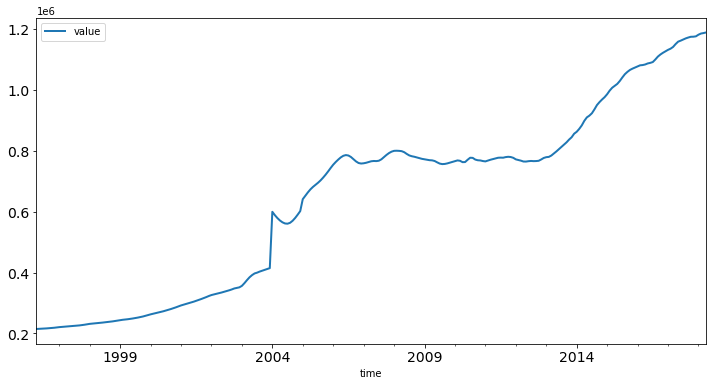

In [26]:
nyc.plot(figsize=(12,6), linewidth=2, fontsize=14)

In [27]:

roll_mean = nyc.rolling(window=8, center=False).mean()
roll_std = nyc.rolling(window=8, center=False).std()

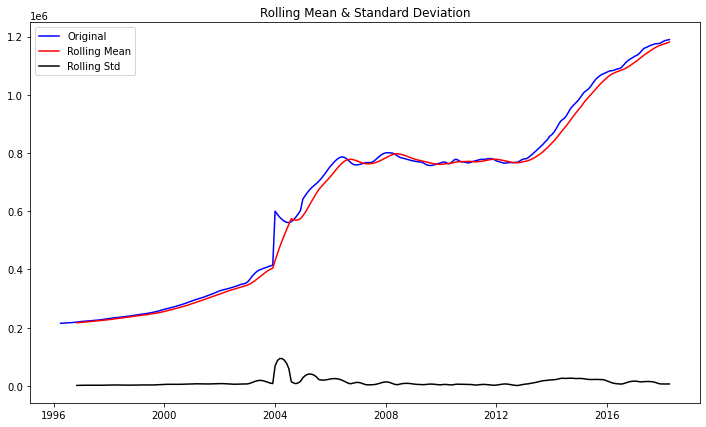

In [28]:
fig = plt.figure(figsize=(12,7))
plt.plot(nyc, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [29]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(nyc)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(0.5733344856328106, 0.9869395921319222, 0, 264, {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}, 5388.9560265894825)


In [30]:

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   0.573334
p-value                          0.986940
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


from the 2 tests above it is very evidet that our data is not stationary

now that our data is not stationary let's start withthe log transformtion to try and make it stationery


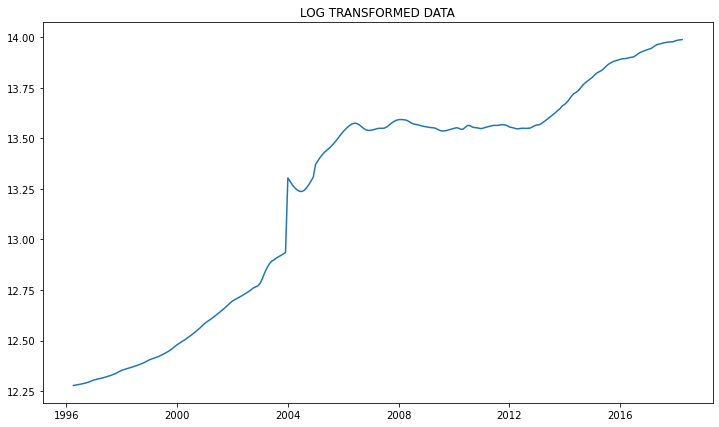

In [31]:
nyc_log = np.log(nyc["value"])
fig = plt.figure(figsize=(12,7))
plt.plot(nyc_log)
plt.title('LOG TRANSFORMED DATA')
plt.show(block=False)

clearly this hasnt made things better, next let's try deferencing method to remove trends and seasonality

In [32]:
nyc_log_diff = nyc_log - nyc_log.shift(1)


In [33]:
roll_mean_diff = nyc_log_diff.rolling(window=12, center=False).mean()
roll_std_diff = nyc_log_diff.rolling(window=12, center=False).std()

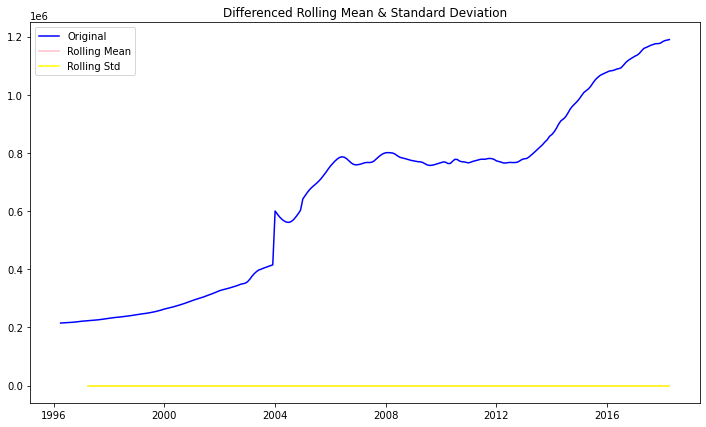

In [34]:
fig = plt.figure(figsize=(12,7))

plt.plot(nyc['value'], color='blue', label='Original')  # Original data
plt.plot(roll_mean_diff, color='pink', label='Rolling Mean')  # Rolling mean of log-differenced data
plt.plot(roll_std_diff, color='yellow', label='Rolling Std')  # Rolling std of log-differenced data

plt.legend(loc='best')
plt.title('Differenced Rolling Mean & Standard Deviation')
plt.show(block=False)

In [35]:
nyc_log_diff.bfill(inplace= True)
nyc_log_diff.head()

time
1996-04-01    0.001927
1996-05-01    0.001927
1996-06-01    0.002155
1996-07-01    0.002262
1996-08-01    0.002465
Name: value, dtype: float64

In [36]:
modelling_data = pd.DataFrame(nyc_log_diff)
modelling_data.head()

,value
time,
1996-04-01,0.001927
1996-05-01,0.001927
1996-06-01,0.002155
1996-07-01,0.002262
1996-08-01,0.002465


plotting ACF and PACF

In [37]:
lag_acf = pd.DataFrame(acf(modelling_data, nlags=24))

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [38]:
lag_pacf = pd.DataFrame(pacf(modelling_data, nlags = 24))

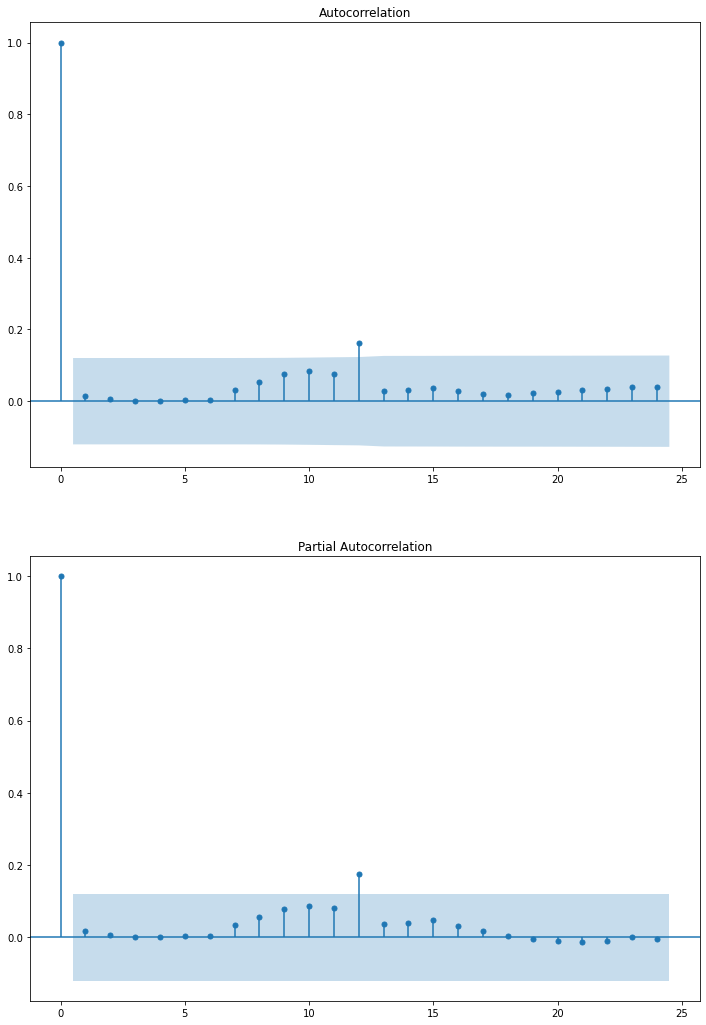

In [39]:
fig = plt.figure(figsize=(12,18))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(modelling_data.dropna(), lags=24, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(modelling_data.dropna(), lags=24, ax=ax2)



## Perform a sesonal decomposition

## Perform dickey fuller Test

# 1.ADF Statistic: 1.9884026968017503
This is the test statistic calculated by the ADF test. A more negative value indicates stronger evidence against the null hypothesis (i.e., the series is stationary).

# 2.p-value: 0.9986576909330424
The p-value indicates the probability of obtaining the observed results assuming the null hypothesis is true. A lower p-value (typically less than 0.05) suggests rejecting the null hypothesis.

# 3.Lags Used: 15
This indicates the number of lagged differences included in the test to account for autocorrelation.

# 4. Number of Observations: 249
This is the number of observations used in the test after lagging.

# 5. Critical Values:
1%: -3.4568881317725864

5%: -2.8732185133016057

10%: -2.5729936189738876

These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels. If the ADF statistic is less than these critical values, we reject the null hypothesis.

## Since the ADF statistic is not less than the critical values and the p-value is significantly higher than 0.05, we fail to reject the null hypothesis.

## This means there is insufficient evidence to conclude that the time series is stationary. Therefore, the time series is likely non-stationary.



## So in this case we will use differencing to detrend the data, vizualise the data and perform dicky fuller test on differenced data and the residual component of seasonal decomposition

Moving Average Detrending:

You'll compute a moving average (rolling mean) over the data. Detrend the series by subtracting the moving average from the original series. Polynomial Fit Detrending:

You'll fit a polynomial to the original series. Detrend the series by subtracting the polynomial fit from the original series. Visualization using Seasonal Decomposition:

Use the seasonal_decompose method to decompose each detrended series. Dickey-Fuller Test:

Run the test on each detrended series and print the results

## 1.Moving Average Detrended Data:
ADF Statistic: -1.3476039691961075

p-value: 0.6071220503066848

## 2.Polynomial Fit Detrended Data:
ADF Statistic: -1.3458634846979578

p-value: 0.6079374566891704

## 1.ADF Statistic:
For both the moving average detrended data and the polynomial fit detrended data, the ADF statistics are -1.3476 and -1.3459, respectively. These values are not sufficiently negative to reject the null hypothesis.
## 2.p-value:
The p-values for both tests are 0.6071 and 0.6079, respectively. These values are significantly higher than the common significance level of 0.05.

## Since the ADF statistics are not less than the critical values and the p-values are much higher than 0.05, we fail to reject the null hypothesis for both the moving average detrended data and the polynomial fit detrended data.

## This means there is insufficient evidence to conclude that the detrended time series data is stationary. Therefore, the detrended time series data is likely non-stationary.

## To further detrend the data, we can consider the following:

## 1.Higher Order Differencing: Sometimes, differencing once isn't enough. You can try differencing the series multiple times until it becomes stationary.

## 2.Log Transformation: Taking the logarithm of a series can help in stabilizing the variance. After this, you might need to perform differencing.

## Combining Methods: You can try differencing after removing the trend using moving average or polynomial fitting.

## 1.Moving Average Detrended Data

ADF Statistic: -1.3476

p-value: 0.6071

Explanation: The ADF statistic is not sufficiently negative, and the p-value is much higher than 0.05. This indicates that we fail to reject the null hypothesis, meaning the data is likely non-stationary.

## 2. Polynomial Fit Detrended Data

ADF Statistic: -1.3459

p-value: 0.6079

Explanation: Similar to the moving average detrended data, the ADF statistic is not sufficiently negative, and the p-value is much higher than 0.05. This suggests that the data is likely non-stationary.

## 3. Second Order Differenced Data

ADF Statistic: -6.0667

p-value: 1.1774e-07

Explanation: The ADF statistic is highly negative, and the p-value is very close to zero. This indicates strong evidence against the null hypothesis, meaning the data is stationary after second-order differencing.

## 4. Log and Differenced Data

ADF Statistic: -2.8492

p-value: 0.0516

Explanation: The ADF statistic is moderately negative, and the p-value is slightly above 0.05. This suggests that the data is on the borderline of being stationary. It might be considered stationary at a slightly higher significance level (e.g., 0.10).

## 5. Moving Average Detrended and Differenced Data

ADF Statistic: -5.6844

Explanation: The ADF statistic is highly negative, indicating strong evidence against the null hypothesis. This suggests that the data is stationary after applying both moving average detrending and differencing. The p-value is not provided, but given the ADF statistic, it is likely very low, further supporting stationarity.

## Summary

Non-Stationary: Moving Average Detrended Data, Polynomial Fit Detrended Data.

Borderline Stationary: Log and Differenced Data.

Stationary: Second Order Differenced Data, Moving Average Detrended and Differenced Data.

## The results indicate that second-order differencing and a combination of Moving average detrended and differenced data are effective in making the time series data stationary.

## So we will go ahead and perform the following below; 

## Log Transformation: Which Stabilizes variance.

## First Differencing: It Removes trends.

## Second Differencing: It Further removes trends and seasonality.

## ADF Test: Checks for stationarity by testing for the presence of a unit root.

# The p-value 4.4442208125919053e-07 can be written as 0.0000000044442208125919053. this is close to zero and indicates the data is stationary

## So since the data is stationary, will plot an ACF and PACF for the second differenced series

The ACF plot helps you understand the correlation between an element and its preceding elements. For an ARIMA model, this will help us determine the MA (Moving Average) component.

The PACF plot shows the correlation between an element and its preceding elements but removes the influence of intervening points. It helps us decide the AR (AutoRegressive) component for the ARIMA model.

A sharp drop in ACF after lag k suggests an MA(k) model might be suitable.

A gradual decline suggests an AR model. The PACF plot can similarly guide the selection of AR terms.

Based on the ACF and PACF plots, we will then proceed to fit an ARIMA model with the appropriate parameters.

# Modelling